File loaded successfully!

Data Preview:
                  Group          X          Y
0  Black or African Am.  13.859859  46.159285
1  Black or African Am.  13.463475  45.248538
2  Black or African Am.  14.356196  42.263730
3  Black or African Am.  16.570827  40.889739
4  Black or African Am.  12.391661  51.719341

Column Names:
Index(['Group', 'X', 'Y'], dtype='object')

Unique Group Values:
['Black or African Am.' 'Han Chinese' 'White']

Missing Values:
Group    0
X        0
Y        0
dtype: int64

Correlation Coefficients:
Black or African Am.: -0.859
Han Chinese: -0.823
White: -0.806
Plot saved to: D:\OneDrive\Project\Scalp_to_cortex\manuscript\NC\figure\python\joint_plot.png


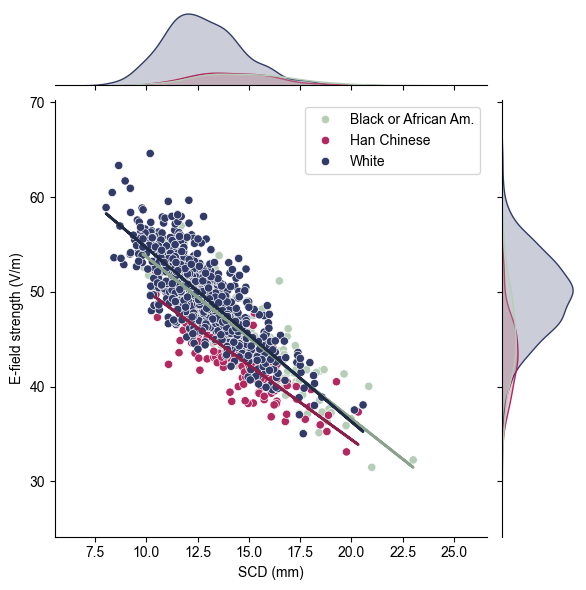

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from scipy.stats import linregress

# Verify file existence
file_path = r'D:\OneDrive\Project\Scalp_to_cortex\manuscript\NC\figure\python\C3_open.xlsx'
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' does not exist.")
    print("Directory contents:", os.listdir(r'D:\OneDrive\Project\Scalp_to_cortex\manuscript\NC\figure\python'))
    exit()

# 读取Excel文件
try:
    data = pd.read_excel(file_path)
    print("File loaded successfully!")
except ImportError as e:
    print(f"ImportError: {str(e)}. Please install required libraries (e.g., 'pip install pandas seaborn matplotlib openpyxl scipy').")
    exit()
except FileNotFoundError:
    print("FileNotFoundError: File not found. Check the path and filename.")
    exit()
except PermissionError:
    print("PermissionError: Cannot access file. Ensure it's not open elsewhere and check permissions.")
    exit()
except Exception as e:
    print(f"Other error while reading file: {str(e)}")
    exit()

# 检查数据
print("\nData Preview:")
print(data.head())
print("\nColumn Names:")
print(data.columns)
print("\nUnique Group Values:")
print(data['Group'].unique())
print("\nMissing Values:")
print(data.isna().sum())

# 检查数据是否为空
if data.empty:
    print("Error: Data is empty. Check the Excel file content.")
    exit()

# 检查预期列
required_columns = ['Group', 'X', 'Y']
if not all(col in data.columns for col in required_columns):
    print(f"Error: Data must contain columns: {required_columns}")
    print(f"Found columns: {list(data.columns)}")
    exit()

# 检查Group值
expected_groups = ["Black or African Am.", "Han Chinese", "White"]
if not all(group in expected_groups for group in data['Group'].unique()):
    print(f"Warning: Some group values differ from expected: {expected_groups}")
    print("Found groups:", data['Group'].unique())

# 检查数据类型
if not (data['X'].dtype in ['float64', 'int64'] and data['Y'].dtype in ['float64', 'int64']):
    print("Error: Columns 'X' and 'Y' must be numeric.")
    exit()

# 设置字体（优先Arial，备用sans-serif）
try:
    plt.rcParams['font.family'] = 'Arial'
except:
    print("Warning: Arial font not found, using sans-serif.")
    plt.rcParams['font.family'] = 'sans-serif'

# 自定义颜色
palette = {
    "Black or African Am.": "#B6CDB7",  # RGB(182, 205, 183)
    "White": "#323B67",                 # RGB(50, 59, 103)
    "Han Chinese": "#B22860"            # RGB(178, 40, 96)
}
line_colors = {
    "Black or African Am.": "#8BA38C",  # Darker green
    "White": "#1F2A44",                 # Darker blue
    "Han Chinese": "#8A1F4A"            # Darker pink
}

# 创建联合分布图
g = sns.jointplot(data=data, x="X", y="Y", hue="Group", kind="scatter", 
                  palette=palette, marginal_kws=dict(fill=True), height=6)

# 添加线性回归线
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]
    if len(group_data) > 1:  # 确保有足够的数据点
        slope, intercept, r_value, _, _ = linregress(group_data['X'], group_data['Y'])
        x_vals = group_data['X']
        y_vals = slope * x_vals + intercept
        g.ax_joint.plot(x_vals, y_vals, color=line_colors[group], linestyle='-', linewidth=2)

# 设置纯白背景
g.ax_joint.set_facecolor('#FFFFFF')
g.ax_marg_x.set_facecolor('#FFFFFF')
g.ax_marg_y.set_facecolor('#FFFFFF')

# 设置标题和标签
g.set_axis_labels("SCD (mm)", "E-field strength (V/m)")

# 调整图例位置，移除“Group”标题
g.ax_joint.legend(title="", loc="best")

# 计算并打印每组的相关系数
print("\nCorrelation Coefficients:")
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]
    if len(group_data) > 1:  # 确保有足够的数据点
        corr = group_data['X'].corr(group_data['Y'])
        print(f"{group}: {corr:.3f}")

# 保存图形到本地
output_path = r'D:\OneDrive\Project\Scalp_to_cortex\manuscript\NC\figure\python\joint_plot.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', format='png')
print(f"Plot saved to: {output_path}")

# 确保显示图形
plt.ion()  # Enable interactive mode for scripts
plt.show(block=True)